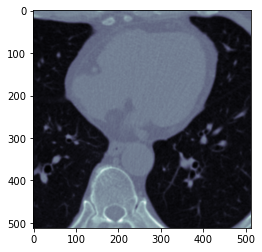

In [6]:
import SimpleITK as sitk
import pydicom
import pylab
import numpy as np

img = r'C:\Users\TMU_AIMC\Desktop\#8-Heart-CaCT-000031\Study-CT-20261031-192\Series-8\Image-1.dcm'
mask = r'C:\Users\TMU_AIMC\Desktop\#8-Heart-CaCT-000031\Study-CT-20261031-192\Series-800'

ds = pydicom.dcmread(img)
pixel_bytes = ds.PixelData
pix = ds.pixel_array # (91, 512, 512, 3)

pylab.imshow(ds.pixel_array[50,:,:,0], cmap=pylab.cm.bone)
pylab.show()

In [9]:
np.unique(pix)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11]:
# HU = pixel_val*slope+ intercept
rescale_slope = 1
rescale_intercept = -1024

hu_img = pix * rescale_slope + rescale_intercept
print(np.unique(hu_img))

[-1024 -1023 -1022 -1021 -1020 -1019 -1018 -1017 -1016 -1015 -1014 -1013
 -1012 -1011 -1010 -1009 -1008 -1007 -1006 -1005 -1004 -1003 -1002 -1001
 -1000  -999  -998  -997  -996  -995  -994  -993  -992  -991  -990  -989
  -988  -987  -986  -985  -984  -983  -982  -981  -980  -979  -978  -977
  -976  -975  -974  -973  -972  -971  -970  -969  -968  -967  -966  -965
  -964  -963  -962  -961  -960  -959  -958  -957  -956  -955  -954  -953
  -952  -951  -950  -949  -948  -947  -946  -945  -944  -943  -942  -941
  -940  -939  -938  -937  -936  -935  -934  -933  -932  -931  -930  -929
  -928  -927  -926  -925  -924  -923  -922  -921  -920  -919  -918  -917
  -916  -915  -914  -913  -912  -911  -910  -909  -908  -907  -906  -905
  -904  -903  -902  -901  -900  -899  -898  -897  -896  -895  -894  -893
  -892  -891  -890  -889  -888  -887  -886  -885  -884  -883  -882  -881
  -880  -879  -878  -877  -876  -875  -874  -873  -872  -871  -870  -869
  -868  -867  -866  -865  -864  -863  -862  -861  -

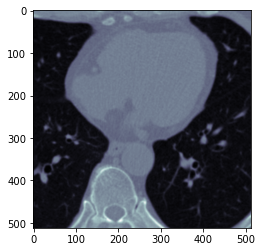

In [12]:
pylab.imshow(hu_img[50,:,:,0], cmap=pylab.cm.bone)
pylab.show()

In [3]:
import SimpleITK as sitk
import numpy as np

src = r'C:\Users\TMU_AIMC\Desktop\#8-Heart-CaCT-000031\Study-CT-20261031-192\Series-8'

def get_dicom_array_and_info(path):

    series_IDs = sitk.ImageSeriesReader.GetGDCMSeriesIDs(path)
    if not series_IDs:
        raise IOError("ERROR: given directory \"" + path + "\" does not contain a DICOM series.")

    series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(path, series_IDs[0])

    series_reader = sitk.ImageSeriesReader()
    series_reader.SetFileNames(series_file_names)
    series_reader.MetaDataDictionaryArrayUpdateOn()
    series_reader.LoadPrivateTagsOn()
    itk_img = series_reader.Execute()

    seriesuid = series_reader.GetGDCMSeriesIDs(path)[0]
    img_array = sitk.GetArrayFromImage(itk_img) # z,y,x
    origin = np.array(itk_img.GetOrigin()) # x,y,z
    spacing = np.array(itk_img.GetSpacing()) # x,y,z

    return img_array, seriesuid, origin, spacing
    
#     dicom_names = reader.GetGDCMSeriesFileNames(src)
#     reader.SetF

img_array, origin, spacing, seriesuid = get_dicom_array_and_info(src)
print(seriesuid)
print(img_array.shape)
print(origin)
print(spacing)

RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: D:\a\1\sitk\Code\IO\src\sitkImageSeriesReader.cxx:163:
sitk::ERROR: The file in the series have unsupported 3 dimensions.

In [ ]:
import SimpleITK as sitk

# A file name that belongs to the series we want to read
file_name = '1.dcm'
data_directory = '.'

# Read the file's meta-information without reading bulk pixel data
file_reader = sitk.ImageFileReader()
file_reader.SetFileName(file_name)
file_reader.ReadImageInformation()

# Get the sorted file names, opens all files in the directory and reads the meta-information
# without reading the bulk pixel data
series_ID = file_reader.GetMetaData('0020|000e')
sorted_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(data_directory, series_ID)

# Read the bulk pixel data
img = sitk.ReadImage(sorted_file_names)


In [2]:
import SimpleITK as sitk

path = r'D:\Radiomics_latest\TMUH_Lung_Raw\SHHTMUH\300104035\S30'
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(path)
reader.SetFileNames(dicom_names)
# reader.GetMetaData(0, '0010|0010')
image = reader.Execute()
image_array = sitk.GetArrayFromImage(image) # z, y, x
origin = image.GetOrigin() # x, y, z
spacing = image.GetSpacing() # x, y, z

In [3]:
print(origin)

(-140.10000610351562, -122.5, -238.75)


In [4]:
print(spacing)

(0.537109, 0.537109, 5.0)


In [5]:
print(image_array.shape)

(53, 512, 512)


In [6]:
class Ironmen:
    '''這是一個叫做 Ironmen 的類別''' # Doc string
    def __init__(self, group, participants):
        self.group = group
        self.participants = participants

# 根據 Ironmen 類別建立一個物件 modern_web
modern_web = Ironmen("Modern Web", 54)

# 印出 modern_web 的兩個屬性
print(modern_web.group)
print(modern_web.participants)

# 印出 modern_web 的類別 doc string
print(modern_web.__doc__)

Modern Web
54
這是一個叫做 Ironmen 的類別


In [30]:
ironmen = [56, 8, 19, 14, 6, 71]
ironmen_array = np.array(ironmen)

print(ironmen_array.ndim) # number of dimensions
print(ironmen_array.shape) # m*n
print(ironmen_array.dtype) # 資料類型

1
(6,)
int32


In [8]:
import numpy as np
print(np.empty((2, 6, 2)))

[[[6.95257185e-310 6.95257185e-310]
  [0.00000000e+000 9.95216026e-312]
  [9.95378865e-312 4.94065646e-324]
  [0.00000000e+000 0.00000000e+000]
  [4.04738577e-320 0.00000000e+000]
  [1.23022346e-321 9.95391810e-312]]

 [[1.49122313e-312 8.90100844e-307]
  [0.00000000e+000 4.90391720e+252]
  [8.37170571e-144 5.91850359e-085]
  [5.89321262e+294 7.41098469e-323]
  [6.40953623e-315 0.00000000e+000]
  [4.94065646e-324             nan]]]


In [12]:
ironmen = ["56", "8", "19", "14", "6", "71"]
ironmen_str_array = np.array(ironmen)

print(ironmen_str_array.dtype)
print("---") # 分隔線

# 轉換為 int64
ironmen_int_array = ironmen_str_array.astype(np.int64)
print(ironmen_int_array.dtype)

<U2
---
int64


In [14]:
import numpy as np

my_array = np.arange(10)
print(my_array)
print(my_array[0])
print(my_array[0:5])
print("---") # 分隔線

my_2d_array = np.array([np.arange(0, 5), np.arange(5, 10)])
print(my_2d_array)
print("---") # 分隔線
print(my_2d_array[1, :]) # 第二列
print(my_2d_array[:, 1]) # 第二欄
print(my_2d_array[1, 1]) # 第二列第二欄的元素

[0 1 2 3 4 5 6 7 8 9]
0
[0 1 2 3 4]
---
[[0 1 2 3 4]
 [5 6 7 8 9]]
---
[5 6 7 8 9]
[1 6]
6


In [18]:
import numpy as np

ironmen = [56, 8, 19, 14, 6, 71]
groups = ["Modern Web", "DevOps", "Cloud", "Big Data", "Security", "自我挑戰組"]
ironmen_array = np.array(ironmen)
groups_array = np.array(groups)

# 用人數去篩選組別
print(ironmen_array >= 10) # 布林值陣列
print(groups_array[ironmen_array >= 10]) # 鐵人數大於 10 的組別

# 用組別去篩選人數
print(groups_array != "自我挑戰組") # 布林值陣列
print(ironmen_array[groups_array != "自我挑戰組"]) # 除了自我挑戰組以外的鐵人數

[ True False  True  True False  True]
['Modern Web' 'Cloud' 'Big Data' '自我挑戰組']
[ True  True  True  True  True False]
[56  8 19 14  6]


In [22]:
import numpy as np

# 建立一個 2d array
my_1d_array = np.arange(10)
my_2d_array = my_1d_array.reshape((2, 5))
print(my_2d_array)
print("---") # 分隔線
print(my_2d_array.T)

[[0 1 2 3 4]
 [5 6 7 8 9]]
---
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


In [29]:
import numpy as np

ironmen_array = np.array([56, 8, 19, 14, 6, np.nan])

print(ironmen_array)
# 把 nan換成 71
np.where(np.isnan(ironmen_array), 'hello', ironmen_array)

[56.  8. 19. 14.  6. nan]


array(['56.0', '8.0', '19.0', '14.0', '6.0', 'hello'], dtype='<U32')

In [26]:
import numpy as np

normal_samples = np.random.normal(size = 10) # 生成 10 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數
uniform_samples = np.random.uniform(size = 10) # 生成 10 組介於 0 與 1 之間均勻分配隨機變數

print(normal_samples)
print("---") # 分隔線
print(uniform_samples)

[-0.65231221 -0.6634739   0.76736785 -0.64577143  2.21146827 -0.36987494
 -0.59711973  1.26252452  0.77736416 -0.59514643]
---
[0.03258778 0.04160368 0.71467082 0.94505642 0.6766913  0.31758778
 0.68672291 0.23351761 0.41242178 0.55836983]


In [31]:
my_float = 8.7
print(my_float.as_integer_ratio())
print(my_float.is_integer())
print(my_float.hex())
print(float.fromhex("0x1.1666666666666p+3"))

(2448832297382707, 281474976710656)
False
0x1.1666666666666p+3
8.7


In [32]:
my_int = 87
print(my_int.bit_length())
print(my_int.to_bytes(length = 2, byteorder = "big"))
print(int.from_bytes(b'\x00W', byteorder = "big"))
print("---")
print(my_int.to_bytes(length = 10, byteorder = "big"))
print(int.from_bytes(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00W', byteorder = "big"))

7
b'\x00W'
87
---
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00W'
87


In [34]:
my_complex = 8 - 7j
print(my_complex.real)
print(my_complex.imag)
print(my_complex.conjugate())

8.0
-7.0
(8+7j)


In [35]:
my_str = "It's the 2017 ithelp ironman contest!!!"

print(my_str.startswith("It's")) # True
print(my_str.endswith("contest??")) # False
print(my_str.find("2017")) # 9
print(my_str.count("!")) # 3
print(my_str.strip("!")) # It's the 2017 ithelp ironman contest
print(my_str.capitalize()) # It's the 2017 ithelp ironman contest!!!
print(my_str.title()) # It'S The 2017 Ithelp Ironman Contest!!!
print(my_str.upper()) # IT'S THE 2017 ITHELP IRONMAN CONTEST!!!
print(my_str.lower()) # it's the 2017 ithelp ironman contest!!!
print(my_str.swapcase()) # iT'S THE 2017 ITHELP IRONMAN CONTEST!!!
print(my_str.replace("contest", "competition")) # It's the 2017 ithelp ironman competition!!!

True
False
9
3
It's the 2017 ithelp ironman contest
It's the 2017 ithelp ironman contest!!!
It'S The 2017 Ithelp Ironman Contest!!!
IT'S THE 2017 ITHELP IRONMAN CONTEST!!!
it's the 2017 ithelp ironman contest!!!
iT'S THE 2017 ITHELP IRONMAN CONTEST!!!
It's the 2017 ithelp ironman competition!!!


In [40]:
ironmen = [56, 8, 18, 14, 6]

ironmen.append(66)
print(ironmen)
ironmen.pop()
print(ironmen)
ironmen.insert(5, 66)
ironmen.remove(66)
print(ironmen)
print(ironmen.index(56))
ironmen.append(66)
ironmen.append(66)
print(ironmen.count(66))
ironmen.pop()
ironmen.sort()
print(ironmen)
ironmen.reverse()
print(ironmen)

[56, 8, 18, 14, 6, 66]
[56, 8, 18, 14, 6]
[56, 8, 18, 14, 6]
0
2
[6, 8, 14, 18, 56, 66]
[66, 56, 18, 14, 8, 6]


In [49]:
ironmen_dict = {"Modern Web": 56,
                "DevOps": 8,
                "Cloud": 18,
                "Big Data": 14,
                "Security": 6,
                "自我挑戰組": 66
                }

print(ironmen_dict.get("Modern Web"))
print(ironmen_dict.keys())

print(ironmen_dict.values())

ironmen_dict.items()

56
dict_keys(['Modern Web', 'DevOps', 'Cloud', 'Big Data', 'Security', '自我挑戰組'])
dict_values([56, 8, 18, 14, 6, 66])


dict_items([('Modern Web', 56), ('DevOps', 8), ('Cloud', 18), ('Big Data', 14), ('Security', 6), ('自我挑戰組', 66)])

In [50]:
ironmen_dict = {"Modern Web": 56,
                "DevOps": 8,
                "Cloud": 18,
                "Big Data": 14,
                "Security": 6,
                "自我挑戰組": 66
                }

ironmen_dict.

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [55]:
import os
os.getcwd()

'C:\\Users\\TMU_AIMC\\Desktop\\james'

# pandas屬性及方法

In [60]:
import pandas as pd

groups = ["Modern Web", "DevOps", "Cloud", "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, 77]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen_dict)
print(ironmen_df)
print("---") # 分隔線

# 選擇欄位
print(ironmen_df.ix[:, "groups"])
print("---") # 分隔線

# 選擇觀測值
print(ironmen_df.ix[0])
print("---") # 分隔線

# 同時選擇欄位與觀測值
print(ironmen_df.ix[0, "groups"])

       groups  ironmen
0  Modern Web       59
1      DevOps        9
2       Cloud       19
3    Big Data       14
4    Security        6
5       自我挑戰組       77
---
0    Modern Web
1        DevOps
2         Cloud
3      Big Data
4      Security
5         自我挑戰組
Name: groups, dtype: object
---
groups     Modern Web
ironmen            59
Name: 0, dtype: object
---
Modern Web


C:\Users\TMU_AIMC\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\TMU_AIMC\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\TMU_AIMC\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [64]:
import pandas as pd

groups = ["Modern Web", "DevOps", "Cloud", "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, 77]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen_dict)

filter = ironmen_df["ironmen"] > 15 # 參賽人數大於 10
ironmen_df[filter] # 篩選 data frame

,groups,ironmen
0,Modern Web,59
2,Cloud,19
5,自我挑戰組,77


In [71]:
import pandas as pd

groups = ["Modern Web", "DevOps", "Cloud", "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, 77]

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen, columns = ["ironmen"], index = groups)
print(ironmen_df)
# 用索引值排序
ironmen_df.sort_index()

            ironmen
Modern Web       59
DevOps            9
Cloud            19
Big Data         14
Security          6
自我挑戰組            77


,ironmen
Big Data,14
Cloud,19
DevOps,9
Modern Web,59
Security,6
自我挑戰組,77


In [73]:
print(ironmen_df.sum()) # 計算總鐵人數
print("---") # 分隔線
print(ironmen_df.mean()) # 計算平均鐵人數
print("---") # 分隔線
print(ironmen_df.median()) # 計算中位數
print("---") # 分隔線
print(ironmen_df.describe()) # 描述統計
# 用數值排序
ironmen_df.sort_values(by = "ironmen")

ironmen    184
dtype: int64
---
ironmen    30.666667
dtype: float64
---
ironmen    16.5
dtype: float64
---
         ironmen
count   6.000000
mean   30.666667
std    29.803803
min     6.000000
25%    10.250000
50%    16.500000
75%    49.000000
max    77.000000


,ironmen
Security,6
DevOps,9
Big Data,14
Cloud,19
Modern Web,59
自我挑戰組,77


In [80]:
import pandas as pd

gender = ["Male", "Male", "Female", "Male", "Male", "Male", "Female", "Male", "Male"]
name = ["蒙其·D·魯夫", "羅羅亞·索隆", "娜美", "騙人布", "文斯莫克·香吉士", "多尼多尼·喬巴", "妮可·羅賓", "佛朗基", "布魯克"]

# 建立 data frame
ironmen_df = pd.DataFrame(gender, columns = ["gender"], index = name)
print(ironmen_df)
# 計算男女各有幾個觀測值
pd.value_counts(ironmen_df.gender)

          gender
蒙其·D·魯夫     Male
羅羅亞·索隆      Male
娜美        Female
騙人布         Male
文斯莫克·香吉士    Male
多尼多尼·喬巴     Male
妮可·羅賓     Female
佛朗基         Male
布魯克         Male


Male      7
Female    2
Name: gender, dtype: int64

In [85]:
import numpy as np
import pandas as pd

groups = ["Modern Web", "DevOps", np.nan, "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, np.nan]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen_dict)
print('Raw DF:\n',ironmen_df)
print("---")


print(ironmen_df.ix[:, "groups"].isnull()) # 判斷哪些組的組名是遺失值
print("---") # 分隔線
print(ironmen_df.ix[:, "ironmen"].notnull()) # 判斷哪些組的鐵人數不是遺失值

Raw DF:
        groups  ironmen
0  Modern Web     59.0
1      DevOps      9.0
2         NaN     19.0
3    Big Data     14.0
4    Security      6.0
5       自我挑戰組      NaN
---
0    False
1    False
2     True
3    False
4    False
5    False
Name: groups, dtype: bool
---
0     True
1     True
2     True
3     True
4     True
5    False
Name: ironmen, dtype: bool


C:\Users\TMU_AIMC\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\TMU_AIMC\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [86]:
import numpy as np
import pandas as pd

groups = ["Modern Web", "DevOps", np.nan, "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, np.nan]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen_dict)

ironmen_df_na_dropped = ironmen_df.dropna() # 有遺失值的觀測值都刪除
print(ironmen_df_na_dropped)
print("---") # 分隔線
ironmen_df_na_filled = ironmen_df.fillna(0) # 有遺失值的觀測值填補 0
print(ironmen_df_na_filled)
print("---") # 分隔線
ironmen_df_na_filled = ironmen_df.fillna({"groups": "Cloud", "ironmen": 71}) # 依欄位填補遺失值
print(ironmen_df_na_filled)

       groups  ironmen
0  Modern Web     59.0
1      DevOps      9.0
3    Big Data     14.0
4    Security      6.0
---
       groups  ironmen
0  Modern Web     59.0
1      DevOps      9.0
2           0     19.0
3    Big Data     14.0
4    Security      6.0
5       自我挑戰組      0.0
---
       groups  ironmen
0  Modern Web     59.0
1      DevOps      9.0
2       Cloud     19.0
3    Big Data     14.0
4    Security      6.0
5       自我挑戰組     71.0
